In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [240]:
df = pd.read_csv("fake_news_dataset.csv")
df.head()

,id,title,author,text,state,date_published,source,category,sentiment_score,word_count,...,num_shares,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
0,1,Breaking News 1,Jane Smith,This is the content of article 1. It contains ...,Tennessee,30-11-2021,The Onion,Entertainment,-0.22,1302,...,47305,450,Center,FALSE,1,76,6,0.84,53.35,Fake
1,2,Breaking News 2,Emily Davis,This is the content of article 2. It contains ...,Wisconsin,02-09-2021,The Guardian,Technology,0.92,322,...,39804,530,Left,Mixed,1,1,5,0.85,28.28,Fake
2,3,Breaking News 3,John Doe,This is the content of article 3. It contains ...,Missouri,13-04-2021,New York Times,Sports,0.25,228,...,45860,763,Center,Mixed,0,57,1,0.72,0.38,Fake
3,4,Breaking News 4,Alex Johnson,This is the content of article 4. It contains ...,North Carolina,08-03-2020,CNN,Sports,0.94,155,...,34222,945,Center,TRUE,1,18,10,0.92,32.20,Fake
4,5,Breaking News 5,Emily Davis,This is the content of article 5. It contains ...,California,23-03-2022,Daily Mail,Technology,-0.01,962,...,35934,433,Right,Mixed,0,95,6,0.66,77.70,Real


In [241]:
df.shape

(4000, 24)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4000 non-null   int64  
 1   title              4000 non-null   object 
 2   author             4000 non-null   object 
 3   text               4000 non-null   object 
 4   state              4000 non-null   object 
 5   date_published     4000 non-null   object 
 6   source             4000 non-null   object 
 7   category           4000 non-null   object 
 8   sentiment_score    4000 non-null   float64
 9   word_count         4000 non-null   int64  
 10  char_count         4000 non-null   int64  
 11  has_images         4000 non-null   int64  
 12  has_videos         4000 non-null   int64  
 13  readability_score  4000 non-null   float64
 14  num_shares         4000 non-null   int64  
 15  num_comments       4000 non-null   int64  
 16  political_bias     4000 

Data Preprocessing


In [244]:
#Remove Duplicate
duplicate = df.duplicated()
print(duplicate.sum())

0


In [245]:
df.isnull().sum()

id                   0
title                0
author               0
text                 0
state                0
date_published       0
source               0
category             0
sentiment_score      0
word_count           0
char_count           0
has_images           0
has_videos           0
readability_score    0
num_shares           0
num_comments         0
political_bias       0
fact_check_rating    0
is_satirical         0
trust_score          0
source_reputation    0
clickbait_score      0
plagiarism_score     0
label                0
dtype: int64

In [246]:
df.dropna(inplace=True)

In [247]:
df.isnull().sum()

id                   0
title                0
author               0
text                 0
state                0
date_published       0
source               0
category             0
sentiment_score      0
word_count           0
char_count           0
has_images           0
has_videos           0
readability_score    0
num_shares           0
num_comments         0
political_bias       0
fact_check_rating    0
is_satirical         0
trust_score          0
source_reputation    0
clickbait_score      0
plagiarism_score     0
label                0
dtype: int64

In [248]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\W", " ", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

In [249]:
df["clean_text"] = df["text"].apply(preprocess_text)

In [250]:
df["label_numeric"] = df["label"].map({"Fake": 1, "Real": 0})


In [251]:
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["label_numeric"], test_size=0.2, random_state=42)


Remove Unuse Columns


In [253]:
X = df["clean_text"]
Y = df["label"]

In [254]:
X

0       this is the content of article 1 it contains d...
1       this is the content of article 2 it contains d...
2       this is the content of article 3 it contains d...
3       this is the content of article 4 it contains d...
4       this is the content of article 5 it contains d...
                              ...                        
3995    this is the content of article 3996 it contain...
3996    this is the content of article 3997 it contain...
3997    this is the content of article 3998 it contain...
3998    this is the content of article 3999 it contain...
3999    this is the content of article 4000 it contain...
Name: clean_text, Length: 4000, dtype: object

Feature Extraction

In [256]:
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 most important words
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [257]:
print("X :",X.shape)


X : (4000,)


Spliting the Dataset

In [259]:
train_data , test_data , train_label ,test_label = train_test_split(X,Y, test_size = 0.3, random_state=0)

In [260]:
print("train_data : ", train_data.shape)
print("train_label : ", train_label.shape)
print("test_data : ", test_data.shape)
print("test_label : ", test_label.shape)

train_data :  (2800,)
train_label :  (2800,)
test_data :  (1200,)
test_label :  (1200,)


Model

Logistic Regression

In [263]:
model_lr = LogisticRegression().fit(X_train_tfidf, y_train)

In [264]:
y_pred = model_lr.predict(X_test_tfidf)
y_pred_proba = model_lr.predict_proba(X_test_tfidf)[:, 1] 

In [265]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [266]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.51375


In [267]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("conf_matrix",conf_matrix)

conf_matrix [[  0 389]
 [  0 411]]


In [268]:

class_report = classification_report(y_test, y_pred, zero_division=1)
print("Class_report", class_report)

Class_report               precision    recall  f1-score   support

           0       1.00      0.00      0.00       389
           1       0.51      1.00      0.68       411

    accuracy                           0.51       800
   macro avg       0.76      0.50      0.34       800
weighted avg       0.75      0.51      0.35       800



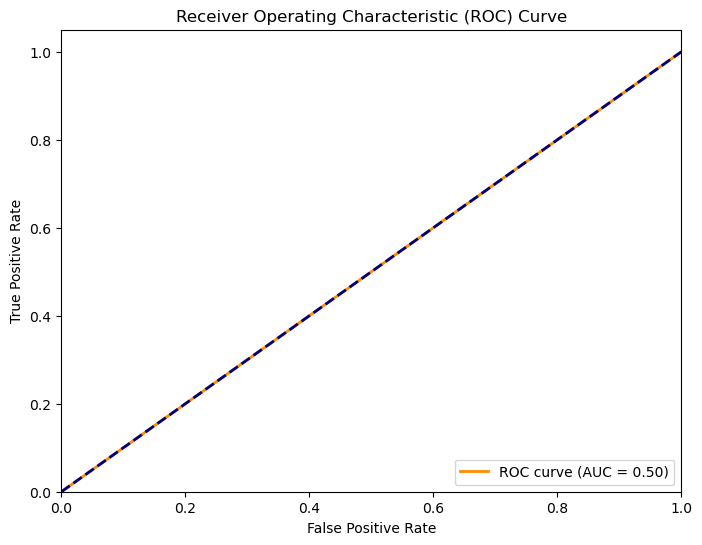

In [269]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Step 9: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Random forest model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [272]:
log_reg_acc = accuracy_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, y_pred)


In [273]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("conf_matrix",conf_matrix)

conf_matrix [[  0 389]
 [  0 411]]


In [274]:
print(f"Random Forest Accuracy: {rf_acc:.4f}")

Random Forest Accuracy: 0.5138


In [275]:
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       389
           1       0.51      1.00      0.68       411

    accuracy                           0.51       800
   macro avg       0.76      0.50      0.34       800
weighted avg       0.75      0.51      0.35       800



In [276]:
print(type(X_test)) 

<class 'pandas.core.series.Series'>
